# Results

In [1]:
# %load imports.py
%load_ext autoreload
%autoreload 2
%reload_kedro
%config Completer.use_jedi = False  ## (To fix autocomplete)

import pandas as pd
from src.models.vmm import ModelSimulator
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"] = (10,10)
plt.style.use('presentation')
from src.visualization.plot import track_plots, plot, captive_plot
import kedro
import numpy as np
import os.path
import anyconfig


from myst_nb import glue
from src.symbols import *
import src.symbols as symbols
from src.system_equations import *

from IPython.display import display, Math, Latex, Markdown
from sympy.physics.vector.printing import vpprint, vlatex

from src.models.regression import MotionRegression

from src.parameters import df_parameters
p = df_parameters["symbol"]

# Read configs:
conf_path = os.path.join("../../conf/base/")
runs_globals_path = os.path.join(
    conf_path,
    "runs_globals.yml",
)

runs_globals = anyconfig.load(runs_globals_path)
model_test_ids = runs_globals["model_test_ids"]

join_globals_path = os.path.join(
    conf_path,
    "join_globals.yml",
)

joins = runs_globals["joins"]
join_runs_dict = anyconfig.load(join_globals_path)

globals_path = os.path.join(
    conf_path,
    "globals.yml",
)
global_variables = anyconfig.load(globals_path)



vmm_names = global_variables["vmms"]
only_joined = global_variables[
    "only_joined"
]  # (regress/predict with only models from joined runs)S

vmms = {}
derivatives = {}
vmm_names.remove('vmm_abkowitz_expanded')
for vmm_name in vmm_names:
    vmms[vmm_name] = catalog.load(vmm_name)
    derivatives[vmm_name] = catalog.load(f"{ vmm_name }.motion_regression.joined.derivatives")
    


UsageError: Line magic function `%reload_kedro` not found.


In [7]:
id = 22774

ship_data = catalog.load("ship_data")
data = catalog.load(f"{ id }.data_ek_smooth")

dataframes = {}
styles = {}

for vmm_name in vmm_names:
    
    #if vmm_name == 'vmm_linear':
    #    continue
    
    df_ = catalog.load(f"{ vmm_name }.motion_regression.joined.{ id }.data_resimulate")
    
    dataframes[vmm_name] = df_.iloc[0:-8000].copy()
    styles[vmm_name] = {'alpha':0.75}


dataframes['model test'] = data.iloc[0:-8000]
styles['model test'] = {'style':'k-', 'alpha':1, 'lw':3}

2022-03-25 08:38:10,942 - kedro.io.data_catalog - INFO - Loading data from `ship_data` (YAMLDataSet)...
2022-03-25 08:38:10,946 - kedro.io.data_catalog - INFO - Loading data from `22774.data_ek_smooth` (CSVDataSet)...
2022-03-25 08:38:10,989 - kedro.io.data_catalog - INFO - Loading data from `vmm_abkowitz.motion_regression.joined.22774.data_resimulate` (CSVDataSet)...
2022-03-25 08:38:11,021 - kedro.io.data_catalog - INFO - Loading data from `vmm_abkowitz_simple.motion_regression.joined.22774.data_resimulate` (CSVDataSet)...
2022-03-25 08:38:11,054 - kedro.io.data_catalog - INFO - Loading data from `vmm_martin.motion_regression.joined.22774.data_resimulate` (CSVDataSet)...
2022-03-25 08:38:11,088 - kedro.io.data_catalog - INFO - Loading data from `vmm_linear.motion_regression.joined.22774.data_resimulate` (CSVDataSet)...
2022-03-25 08:38:11,120 - kedro.io.data_catalog - INFO - Loading data from `vmm_martins_simple.motion_regression.joined.22774.data_resimulate` (CSVDataSet)...


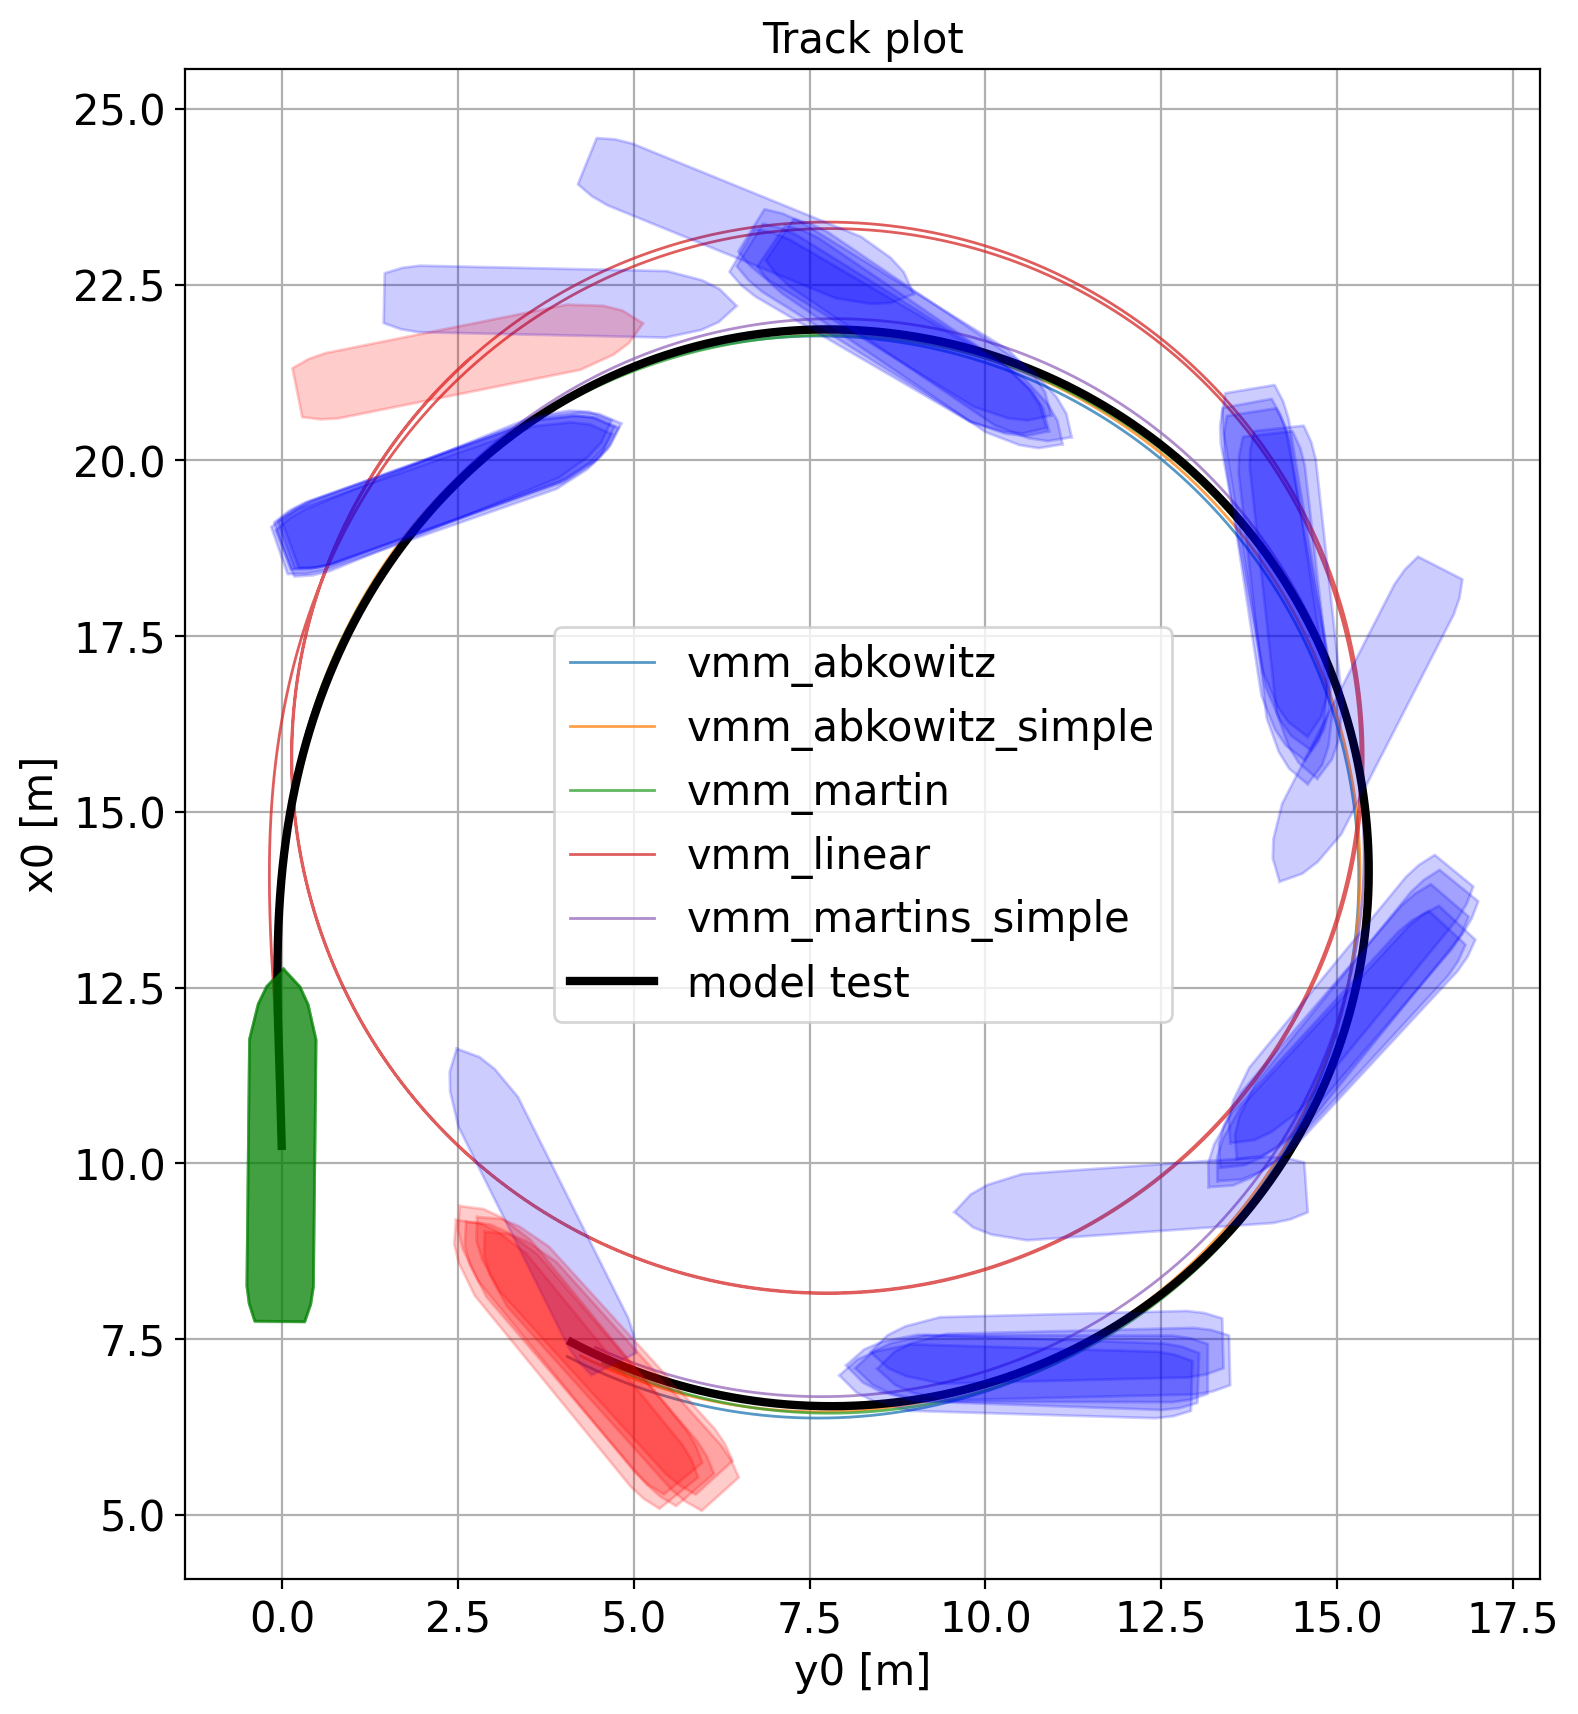

In [8]:
track_plots(dataframes, lpp=ship_data['L'], beam=ship_data['B'], plot_boats=True, styles=styles, N=7);

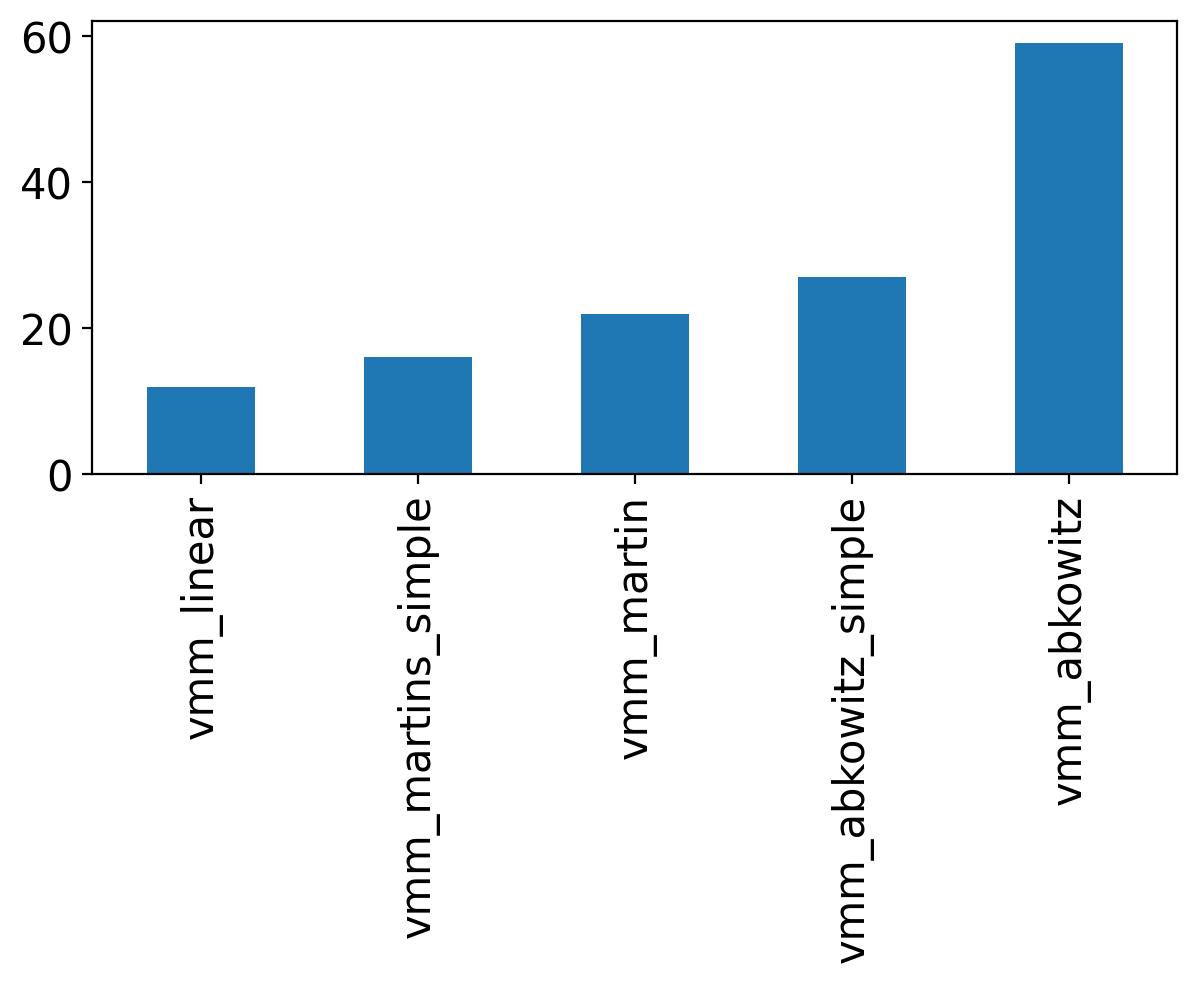

In [6]:
number_of_parameters = pd.Series(dtype=float)
for vmm_name, parameters in derivatives.items():
    number_of_parameters[vmm_name] = len(parameters)
    
fig,ax=plt.subplots()
fig.set_size_inches(7,3)
number_of_parameters.sort_values().plot.bar(ax=ax);